In [88]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats



def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio1_ETL.csv'
portfolio1 = load_data(filepath)

portfolio1 = portfolio1.drop(columns=['id'])
portfolio1.head()

,idade_empresa_anos,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_rm,fl_spa,fl_antt,fl_veiculo,...,nm_divisao_ATIVIDADES DE APOIO A EXTRACAO DE MINERAIS,nm_divisao_DESCONTAMINACAO E OUTROS SERVICOS DE GESTAO DE RESIDUOS,nm_divisao_EXTRACAO DE PETROLEO E GAS NATURAL,nm_divisao_FABRICACAO DE PRODUTOS FARMOQUIMICOS E FARMACEUTICOS,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",de_saude_rescencia_ATE 3 MESES,nm_divisao_EXTRACAO DE CARVAO MINERAL,de_saude_rescencia_ATE 6 MESES,nm_divisao_FABRICACAO DE PRODUTOS DO FUMO
0,0.65,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.59,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.01,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.86,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18.73,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
#To fixate the results between attempts we'll set the random state to 42
random_state = 42

pca = PCA(n_components = None, random_state = random_state)
X = pca.fit_transform(portfolio1)
pca.explained_variance_ratio_

array([4.79555152e-01, 3.77872960e-01, 1.16714914e-01, 1.86243389e-02,
       1.03806889e-03, 5.36064247e-04, 5.03457997e-04, 4.74694989e-04,
       4.36342090e-04, 4.16890826e-04, 4.04622283e-04, 3.35464108e-04,
       3.03042017e-04, 2.78646197e-04, 2.48718969e-04, 2.19716735e-04,
       1.86632728e-04, 1.70305199e-04, 1.38224693e-04, 1.23668101e-04,
       9.75180855e-05, 9.42516247e-05, 8.62055269e-05, 7.97968663e-05,
       7.63215770e-05, 7.30018592e-05, 6.60912808e-05, 6.24849838e-05,
       5.78700858e-05, 5.52989365e-05, 5.09911329e-05, 4.56760762e-05,
       4.22002571e-05, 4.03036925e-05, 3.90775531e-05, 3.65237104e-05,
       3.49703805e-05, 3.44616411e-05, 3.18064280e-05, 3.11018889e-05,
       2.80963028e-05, 2.53429260e-05, 2.28394078e-05, 2.18873149e-05,
       2.08805364e-05, 1.98901871e-05, 1.89067307e-05, 1.76529742e-05,
       1.64244667e-05, 1.26118087e-05, 1.12900383e-05, 9.14630678e-06,
       7.10610376e-06, 6.22829757e-06, 6.09244859e-06, 5.37650856e-06,
      

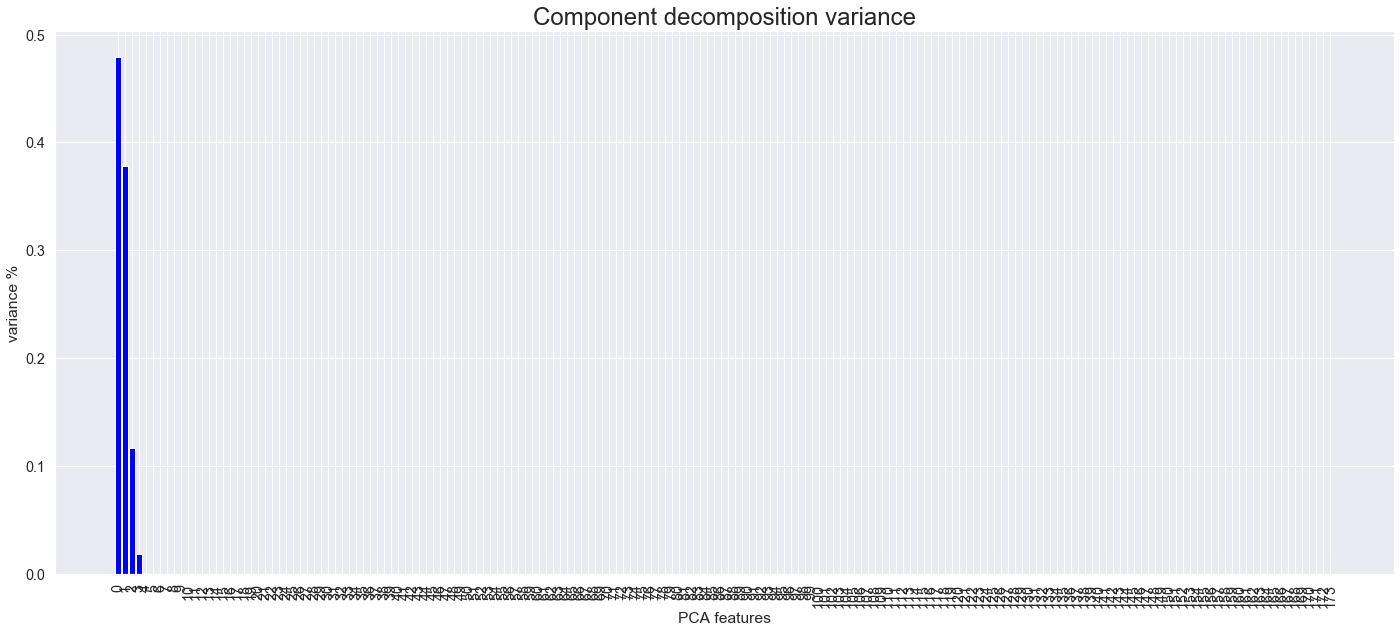

In [90]:
sns.set(font_scale = 1.3)
features = range(pca.n_components_)
plt.figure(figsize=(24,10))
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.title("Component decomposition variance", fontsize=24)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(rotation=90)
plt.xticks(features)
plt.show()

In [91]:
#Just so we can fix a point between attempts we'll work with every compononet that is higher that 5%
components_limit = 0.05
components = pca.explained_variance_ratio_[pca.explained_variance_ratio_ > components_limit]
number_components = len(components)

pca = PCA(n_components = number_components, random_state = random_state) 
X = pca.fit_transform(portfolio1)
pca.explained_variance_ratio_

array([0.47955515, 0.37787296, 0.11671491])

In [92]:
# Visual libraries
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = random_state)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wss, name='elbow', mode='lines'))

fig.update_layout(title='The Elbow Method', 
                  xaxis={"title": "Number of clusters"},
                  yaxis={"title": "Within Sum of Squares"})

fig.show()

After 4 clusters at (the elbow) the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=4 and proceed to the last step in the process.

In [93]:
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)

In [94]:
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

Cluster Evaluation
Since we have no ground truth we will use Silhouette Coefficient, Calinski-Harabasz Index and Davies-Bouldin Index as measures.
Documentation can be found here: 
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [95]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state).fit(X)
labels = kmeans.labels_

silhouette = silhouette_score(X, labels, metric='sqeuclidean')
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print('The Silhouette Coefficient for {0} clusters with {1} components is: {2}.'
      '\nThe Silhouette Coefficient is bounded between -1 for incorrect clustering and +1 for highly dense clustering.' 
      '\nScores around zero indicate overlapping clusters.'.format(number_clusters, number_components, "%.2f" % silhouette))

The Silhouette Coefficient for 4 clusters with 3 components is: 0.62.
The Silhouette Coefficient is bounded between -1 for incorrect clustering and +1 for highly dense clustering.
Scores around zero indicate overlapping clusters.


In [96]:
print('The Calinski-Harabasz Index for {0} clusters with {1} components is: {2}.'
      '\nThe Calinski-Harabasz score is higher when clusters are dense and well separated'
      .format(number_clusters, number_components, "%.2f" % calinski))

The Calinski-Harabasz Index for 4 clusters with 3 components is: 641.26.
The Calinski-Harabasz score is higher when clusters are dense and well separated


In [97]:
print('The Davies-Bouldin Index for {} clusters with {} components is: {}.'
      '\nThe Davies-Bouldin Zero score is the lowest possible score. Values closer to zero indicate a better partition.'
      .format(number_clusters, number_components, "%.2f" % davies))

The Davies-Bouldin Index for 4 clusters with 3 components is: 0.61.
The Davies-Bouldin Zero score is the lowest possible score. Values closer to zero indicate a better partition.


In [98]:
for i in range (2,7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = random_state).fit(X)
    labels = kmeans.labels_
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)
    silhouette = silhouette_score(X, labels, metric='sqeuclidean')
    print('The Silhouette Coefficient for {0} clusters with {1} components is: {2}.'
          .format(i, number_components, "%.2f" % silhouette))
    print('The Calinski-Harabasz Index for {0} clusters with {1} components is: {2}.'
          .format(i, number_components, "%.2f" % calinski))
    print('The Davies-Bouldin Index for {0} clusters with {1} components is: {2}.\n'
          .format(i, number_components, "%.2f" % davies))
    

The Silhouette Coefficient for 2 clusters with 3 components is: 0.99.
The Calinski-Harabasz Index for 2 clusters with 3 components is: 332.49.
The Davies-Bouldin Index for 2 clusters with 3 components is: 0.04.

The Silhouette Coefficient for 3 clusters with 3 components is: 0.65.
The Calinski-Harabasz Index for 3 clusters with 3 components is: 485.81.
The Davies-Bouldin Index for 3 clusters with 3 components is: 0.60.

The Silhouette Coefficient for 4 clusters with 3 components is: 0.62.
The Calinski-Harabasz Index for 4 clusters with 3 components is: 641.26.
The Davies-Bouldin Index for 4 clusters with 3 components is: 0.61.

The Silhouette Coefficient for 5 clusters with 3 components is: 0.62.
The Calinski-Harabasz Index for 5 clusters with 3 components is: 735.27.
The Davies-Bouldin Index for 5 clusters with 3 components is: 0.58.

The Silhouette Coefficient for 6 clusters with 3 components is: 0.63.
The Calinski-Harabasz Index for 6 clusters with 3 components is: 803.78.
The Davie

In [99]:
number_clusters = 2
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

fig = go.Figure()

fig.add_trace()
fig.add_trace(go.Scatter(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], name='Cluster 2', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], name='Cluster 3', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#fig.add_trace(go.Scatter(x=X[y_kmeans == 7, 0], y=X[y_kmeans == 7, 1], name='Cluster 8', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 8, 0], y=X[y_kmeans == 8, 1], name='Cluster 9', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 9, 0], y=X[y_kmeans == 9, 1], name='Cluster 10', mode='markers'))#add more lines if you chose more clusters

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

TypeError: add_trace() missing 1 required positional argument: 'trace'

In [100]:
number_clusters = 3
kmeans = KMeans(n_clusters = number_clusters, init = array, random_state = random_state,n_init=10, max_iter=1000)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#fig.add_trace(go.Scatter(x=X[y_kmeans == 7, 0], y=X[y_kmeans == 7, 1], name='Cluster 8', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 8, 0], y=X[y_kmeans == 8, 1], name='Cluster 9', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 9, 0], y=X[y_kmeans == 9, 1], name='Cluster 10', mode='markers'))#add more lines if you chose more clusters

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_k_means.py:1007: RuntimeWarning:

Explicit initial center position passed: performing only one init in k-means instead of n_init=10



In [101]:
kmeans.cluster_centers_[0:2],kmeans.cluster_centers_[-1]

(array([[  1.67087883,  -1.27684559,   1.46670754],
        [-21.63974567,   5.43345585,  -1.45493144]]),
 array([33.14612616, -4.20270663, -4.27993333]))

In [103]:
array = [0,1,2]
array[0] =kmeans.cluster_centers_[0]
array[1] = kmeans.cluster_centers_[1]
array[2] = kmeans.cluster_centers_[2]
array = np.stack(array, axis=0)
array

array([[  1.67087883,  -1.27684559,   1.46670754],
       [-21.63974567,   5.43345585,  -1.45493144],
       [ 33.14612616,  -4.20270663,  -4.27993333]])

In [104]:
#precompute_distances

number_clusters = 3
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state,n_init=10, max_iter=1000,precompute_distances=True)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], name='Cluster 3', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#fig.add_trace(go.Scatter(x=X[y_kmeans == 7, 0], y=X[y_kmeans == 7, 1], name='Cluster 8', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 8, 0], y=X[y_kmeans == 8, 1], name='Cluster 9', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 9, 0], y=X[y_kmeans == 9, 1], name='Cluster 10', mode='markers'))#add more lines if you chose more clusters

fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()

In [105]:
X[0]

array([  2.86299079,  -2.16534149, -10.67292903])